In [1]:
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import csv
import numpy as np
from sklearn.mixture import BayesianGaussianMixture
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

android=1
ios=2
web=3

1235372 =1
461655 =2
566549 =3
202527=4
620906 =5
928191 =6
976902=7
751082=8
978130=9
868085 =10
648339 =11
503205 =12
493904 =13
144857=14
747048 =15
399399 =16
878393 =17
572514 =18 
948590 =19
310085 =20
454147 =21
481066 =22
517854 =23
700367 =24
814002 =25
1. 不知道干什么
2. 离散连续





In [2]:
df = pd.read_csv('colorado.csv')
df['Charging_Time__hh_mm_ss_'] = pd.to_timedelta(
    df['Charging_Time__hh_mm_ss_'])

# convert duration to hours
df['Charging_Time__hh_mm_ss_'] = df['Charging_Time__hh_mm_ss_'] / \
    pd.Timedelta('1 hour')

# display the resulting DataFrame
print(df)
X = df
X


       Zip_Postal_Code  Charging_Time__hh_mm_ss_  Energy__kWh_  \
0                    2                  1.878056         4.608   
1                    2                  2.370833         8.786   
2                    1                  1.047222         4.940   
3                    2                  0.000000         0.000   
4                    5                  0.973611         3.023   
...                ...                       ...           ...   
43654                3                  2.658056         2.401   
43655                2                  1.100833         6.587   
43656                2                  1.178056         7.130   
43657                3                  2.069444        11.828   
43658                2                  2.340833        14.048   

       GHG_Savings__kg_  Gasoline_Savings__gallons_  
0                 1.936                       0.578  
1                 3.690                       1.103  
2                 2.075                      

,Zip_Postal_Code,Charging_Time__hh_mm_ss_,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_
0,2,1.878056,4.608,1.936,0.578
1,2,2.370833,8.786,3.690,1.103
2,1,1.047222,4.940,2.075,0.620
3,2,0.000000,0.000,0.000,0.000
4,5,0.973611,3.023,1.270,0.379
...,...,...,...,...,...
43654,3,2.658056,2.401,1.705,0.301
43655,2,1.100833,6.587,4.676,0.827
43656,2,1.178056,7.130,5.062,0.895
43657,3,2.069444,11.828,8.398,1.484


In [3]:
# Data cleaning
# convert duration column to timedelta format
df['Charging_Time__hh_mm_ss_'] = pd.to_timedelta(
    df['Charging_Time__hh_mm_ss_'])

# convert duration to hours
df['Charging_Time__hh_mm_ss_'] = df['Charging_Time__hh_mm_ss_'] / \
    pd.Timedelta('1 hour')

# display the resulting DataFrame
print(df)
X=df
X

       Zip_Postal_Code  Charging_Time__hh_mm_ss_  Energy__kWh_  \
0                    2              2.777778e-13         4.608   
1                    2              5.555556e-13         8.786   
2                    1              2.777778e-13         4.940   
3                    2              0.000000e+00         0.000   
4                    5              0.000000e+00         3.023   
...                ...                       ...           ...   
43654                3              5.555556e-13         2.401   
43655                2              2.777778e-13         6.587   
43656                2              2.777778e-13         7.130   
43657                3              5.555556e-13        11.828   
43658                2              5.555556e-13        14.048   

       GHG_Savings__kg_  Gasoline_Savings__gallons_  
0                 1.936                       0.578  
1                 3.690                       1.103  
2                 2.075                      

,Zip_Postal_Code,Charging_Time__hh_mm_ss_,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_
0,2,2.777778e-13,4.608,1.936,0.578
1,2,5.555556e-13,8.786,3.690,1.103
2,1,2.777778e-13,4.940,2.075,0.620
3,2,0.000000e+00,0.000,0.000,0.000
4,5,0.000000e+00,3.023,1.270,0.379
...,...,...,...,...,...
43654,3,5.555556e-13,2.401,1.705,0.301
43655,2,2.777778e-13,6.587,4.676,0.827
43656,2,2.777778e-13,7.130,5.062,0.895
43657,3,5.555556e-13,11.828,8.398,1.484


In [4]:
'''df = pd.read_csv('station_data_dataverse.csv')


x = []
y = []
for i in range(1, 47):
    x.append(str(i))

for i in range(len(x)):
    for j in range(0, 15):

        y.append(df[x[i]][j])
y = pd.DataFrame(y)'''


"df = pd.read_csv('station_data_dataverse.csv')\n\n\nx = []\ny = []\nfor i in range(1, 47):\n    x.append(str(i))\n\nfor i in range(len(x)):\n    for j in range(0, 15):\n\n        y.append(df[x[i]][j])\ny = pd.DataFrame(y)"

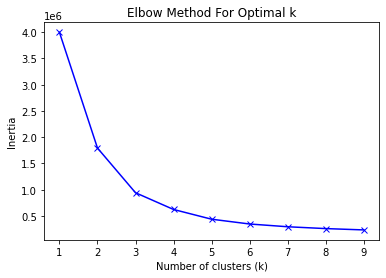

None


In [5]:
def elbowrule(X):
    k_values = range(1, 10)
    inertias = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)

    # Plot elbow curve
    plt.plot(k_values, inertias, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method For Optimal k')
    plt.show()

print(elbowrule(X))


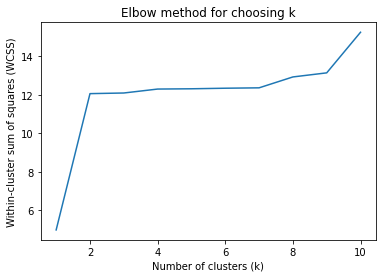

In [6]:
wcss = []

# Compute the WCSS for k=1 to k=10
for k in range(1, 11):
    gmm = GaussianMixture(n_components=k)
    gmm.fit(X)
    wcss.append(gmm.score(X))

# Plot the WCSS as a function of k
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow method for choosing k')
plt.show()



In [7]:
gmm = BayesianGaussianMixture(
    n_components=3, weight_concentration_prior_type='dirichlet_process',max_iter=10000)
gmm.fit(X)

# Get the cluster centers
centers = gmm.means_
# Get the cluster assignments for each data point
labels = gmm.predict(X)

# Print the cluster assignments
print(labels)

# Print the cluster centers
print("Cluster centers:", centers)
    


[0 0 0 ... 2 2 2]
Cluster centers: [[2.54154684e+00 3.14976944e-13 7.27577809e+00 3.05592462e+00
  9.13107999e-01]
 [2.63715282e+00 2.20318627e-12 4.86910327e+01 2.83646620e+01
  6.11073109e+00]
 [2.54460071e+00 3.23970376e-13 7.98920115e+00 5.67223069e+00
  1.00264637e+00]]


In [8]:
n_clusters = 5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Print the cluster labels
print("Cluster labels:", labels)

# Get the cluster centers
centers = kmeans.cluster_centers_

# Print the cluster centers
print("Cluster centers:", centers)

Cluster labels: [2 4 4 ... 4 0 0]
Cluster centers: [[2.50153252e+00 6.04400802e-13 1.38883842e+01 7.79800284e+00
  1.74298524e+00]
 [2.61968307e+00 1.11365953e-12 2.54436393e+01 1.52116159e+01
  3.19317723e+00]
 [2.61290523e+00 5.72392663e-14 1.91132077e+00 1.02404676e+00
  2.39873680e-01]
 [2.56423611e+00 2.17110340e-12 4.82725816e+01 2.98460712e+01
  6.05822396e+00]
 [2.48554583e+00 3.04298212e-13 7.14566559e+00 3.85876804e+00
  8.96780462e-01]]
